In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

614

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ec815d5e459109c09ec5267933365415


In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | madison
Processing Record 2 of Set 1 | mizan teferi
Processing Record 3 of Set 1 | ulaanbaatar
Processing Record 4 of Set 1 | georgetown
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | dukat
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | narsaq
Processing Record 10 of Set 1 | zhangjiakou
Processing Record 11 of Set 1 | altos
Processing Record 12 of Set 1 | dekernes
Processing Record 13 of Set 1 | faanui
Processing Record 14 of Set 1 | kokopo
Processing Record 15 of Set 1 | kaitangata
Processing Record 16 of Set 1 | tazovskiy
Processing Record 17 of Set 1 | bogdanovich
Processing Record 18 of Set 1 | amalapuram
Processing Record 19 of Set 1 | vaini
Processing Record 20 of Set 1 | shaoyang
Processing Record 21 of Set 1 | phalaborwa
Processing Record 22 of Set 1 | natal
Processing Record 23 of Set 1 | norman wells
P

Processing Record 38 of Set 4 | half moon bay
Processing Record 39 of Set 4 | hobart
Processing Record 40 of Set 4 | mount isa
Processing Record 41 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 42 of Set 4 | port hedland
Processing Record 43 of Set 4 | arraial do cabo
Processing Record 44 of Set 4 | louisbourg
City not found. Skipping...
Processing Record 45 of Set 4 | ust-nera
Processing Record 46 of Set 4 | asyut
Processing Record 47 of Set 4 | pangody
Processing Record 48 of Set 4 | antalaha
Processing Record 49 of Set 4 | port said
Processing Record 50 of Set 4 | provideniya
Processing Record 1 of Set 5 | luancheng
Processing Record 2 of Set 5 | kavieng
Processing Record 3 of Set 5 | hanover
Processing Record 4 of Set 5 | chiungutwa
Processing Record 5 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 6 of Set 5 | shitanjing
Processing Record 7 of Set 5 | sambava
Processing Record 8 of Set 5 | dudinka
Processing Record 9 of Set 

City not found. Skipping...
Processing Record 26 of Set 8 | bubaque
Processing Record 27 of Set 8 | pombas
Processing Record 28 of Set 8 | kropotkin
Processing Record 29 of Set 8 | xuddur
Processing Record 30 of Set 8 | kadykchan
City not found. Skipping...
Processing Record 31 of Set 8 | champerico
Processing Record 32 of Set 8 | amapa
Processing Record 33 of Set 8 | nabire
Processing Record 34 of Set 8 | ginda
Processing Record 35 of Set 8 | booue
Processing Record 36 of Set 8 | progreso
Processing Record 37 of Set 8 | selizharovo
Processing Record 38 of Set 8 | raudeberg
Processing Record 39 of Set 8 | tateyama
Processing Record 40 of Set 8 | pokoynoye
Processing Record 41 of Set 8 | mayumba
Processing Record 42 of Set 8 | angoche
Processing Record 43 of Set 8 | saint-leu
Processing Record 44 of Set 8 | tanout
Processing Record 45 of Set 8 | sabha
Processing Record 46 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 47 of Set 8 | mingaora
Processing Record 48 of Set

Processing Record 13 of Set 12 | tukrah
Processing Record 14 of Set 12 | margate
Processing Record 15 of Set 12 | mattru
Processing Record 16 of Set 12 | polaniec
Processing Record 17 of Set 12 | haines junction
Processing Record 18 of Set 12 | havre-saint-pierre
Processing Record 19 of Set 12 | muros
Processing Record 20 of Set 12 | bikin
Processing Record 21 of Set 12 | qandala
Processing Record 22 of Set 12 | maunatlala
Processing Record 23 of Set 12 | chirongui
Processing Record 24 of Set 12 | dodge city
Processing Record 25 of Set 12 | balabac
Processing Record 26 of Set 12 | karpuninskiy
City not found. Skipping...
Processing Record 27 of Set 12 | hun
Processing Record 28 of Set 12 | dusti
Processing Record 29 of Set 12 | paris
Processing Record 30 of Set 12 | mahanoro
Processing Record 31 of Set 12 | stephenville crossing
Processing Record 32 of Set 12 | santa rosa
Processing Record 33 of Set 12 | cobija
Processing Record 34 of Set 12 | marstal
Processing Record 35 of Set 12 | v

In [10]:
len(city_data)

562

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Madison,34.7334,-86.5667,67.42,29,0,14.00,US,2022-02-11 22:48:07
1,Mizan Teferi,6.9833,35.5833,67.96,56,77,3.00,ET,2022-02-11 22:48:08
2,Ulaanbaatar,47.9077,106.8832,-30.87,68,0,4.47,MN,2022-02-11 22:47:02
3,Georgetown,5.4112,100.3354,76.95,95,20,2.30,MY,2022-02-11 22:46:12
4,Busselton,-33.6500,115.3333,58.08,85,27,5.08,AU,2022-02-11 22:48:09
5,Dukat,62.5500,155.5500,-25.01,80,73,3.87,RU,2022-02-11 22:48:09
6,Albany,42.6001,-73.9662,48.85,53,89,9.80,US,2022-02-11 22:48:09
7,Ushuaia,-54.8000,-68.3000,55.06,67,100,5.75,AR,2022-02-11 22:44:18
8,Narsaq,60.9167,-46.0500,23.22,78,100,5.77,GL,2022-02-11 22:48:10
9,Zhangjiakou,40.8100,114.8794,24.31,69,97,0.51,CN,2022-02-11 22:48:11


In [12]:
#reorder columns

new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

In [13]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Madison,US,2022-02-11 22:48:07,34.7334,-86.5667,67.42,29,0,14.00
1,Mizan Teferi,ET,2022-02-11 22:48:08,6.9833,35.5833,67.96,56,77,3.00
2,Ulaanbaatar,MN,2022-02-11 22:47:02,47.9077,106.8832,-30.87,68,0,4.47
3,Georgetown,MY,2022-02-11 22:46:12,5.4112,100.3354,76.95,95,20,2.30
4,Busselton,AU,2022-02-11 22:48:09,-33.6500,115.3333,58.08,85,27,5.08
5,Dukat,RU,2022-02-11 22:48:09,62.5500,155.5500,-25.01,80,73,3.87
6,Albany,US,2022-02-11 22:48:09,42.6001,-73.9662,48.85,53,89,9.80
7,Ushuaia,AR,2022-02-11 22:44:18,-54.8000,-68.3000,55.06,67,100,5.75
8,Narsaq,GL,2022-02-11 22:48:10,60.9167,-46.0500,23.22,78,100,5.77
9,Zhangjiakou,CN,2022-02-11 22:48:11,40.8100,114.8794,24.31,69,97,0.51


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

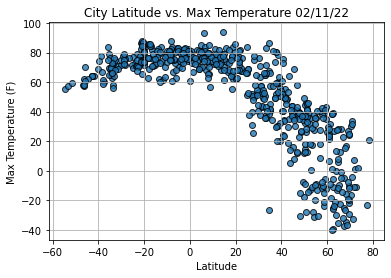

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

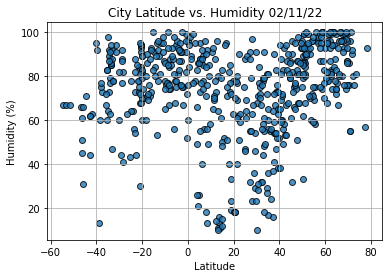

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

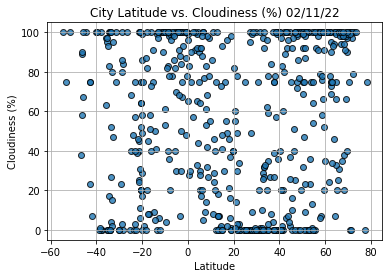

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

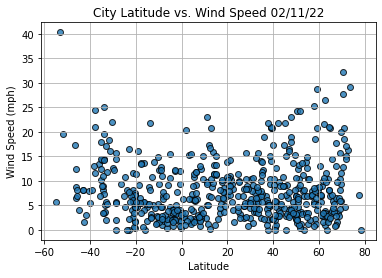

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
index13 = city_data_df.loc[13]

In [22]:
index13

City                       Kokopo
Country                        PG
Date          2022-02-11 22:48:12
Lat                        -4.352
Lng                      152.2633
Max Temp                    80.13
Humidity                       81
Cloudiness                    100
Wind Speed                   4.03
Name: 13, dtype: object

In [23]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Madison,US,2022-02-11 22:48:07,34.7334,-86.5667,67.42,29,0,14.00
1,Mizan Teferi,ET,2022-02-11 22:48:08,6.9833,35.5833,67.96,56,77,3.00
2,Ulaanbaatar,MN,2022-02-11 22:47:02,47.9077,106.8832,-30.87,68,0,4.47
3,Georgetown,MY,2022-02-11 22:46:12,5.4112,100.3354,76.95,95,20,2.30
5,Dukat,RU,2022-02-11 22:48:09,62.5500,155.5500,-25.01,80,73,3.87
...,...,...,...,...,...,...,...,...,...
557,Eureka,US,2022-02-11 23:04:35,40.8021,-124.1637,73.13,59,0,3.00
558,Tromso,NO,2022-02-11 23:02:49,69.6496,18.9570,24.82,93,100,11.50
559,Sisimiut,GL,2022-02-11 23:04:36,66.9395,-53.6735,22.91,96,100,0.72
560,Ust-Ishim,RU,2022-02-11 23:04:37,57.6935,71.1665,-7.60,93,6,8.50


In [24]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Madison,US,2022-02-11 22:48:07,34.7334,-86.5667,67.42,29,0,14.00
1,Mizan Teferi,ET,2022-02-11 22:48:08,6.9833,35.5833,67.96,56,77,3.00
2,Ulaanbaatar,MN,2022-02-11 22:47:02,47.9077,106.8832,-30.87,68,0,4.47
3,Georgetown,MY,2022-02-11 22:46:12,5.4112,100.3354,76.95,95,20,2.30
5,Dukat,RU,2022-02-11 22:48:09,62.5500,155.5500,-25.01,80,73,3.87


In [25]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

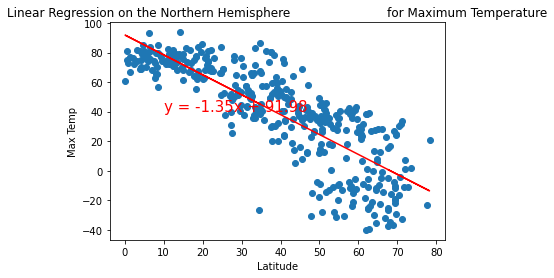

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

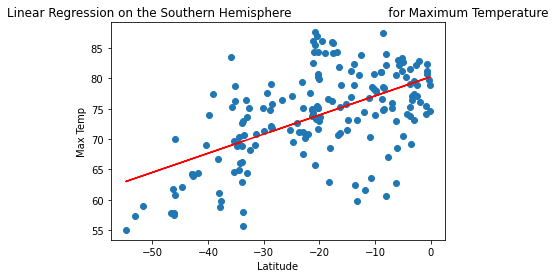

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

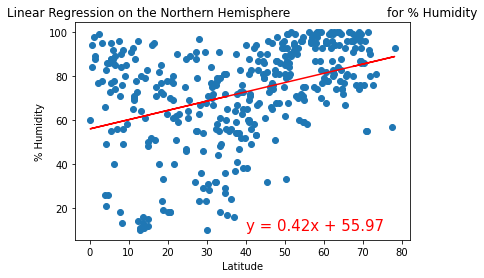

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))


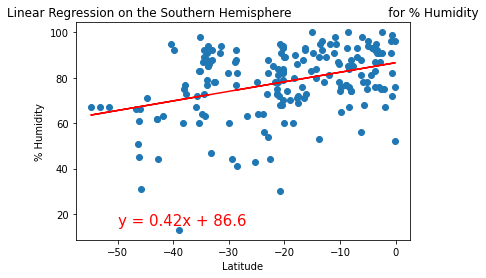

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

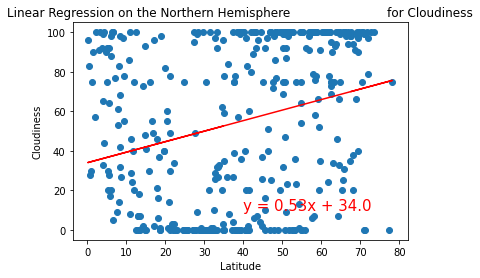

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Cloudiness', 'Cloudiness',(40,10))



In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n
                        for % Cloudiness', '% Cloudiness',(-50,60))


SyntaxError: EOL while scanning string literal (1670840652.py, line 6)